In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

from PIL import Image
from keras.preprocessing.image import img_to_array, array_to_img, load_img
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2 as cv

import random
from sklearn.metrics import classification_report, confusion_matrix
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, BatchNormalization,Input,concatenate, AveragePooling2D
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.utils import plot_model
import tensorflow as tf

import os

In [3]:
# create dictionary of relationship between label and sign
categories = {0:"0",1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9",
              10:"a",11:"b",12:"c",13:"d",14:"e",15:"f",16:"g",17:"h",18:"i",
              19:"j",20:"k",21:"l",22:"m",23:"n",24:"o",25:"p",26:"q",27:"r",
              28:"s",29:"t",30:"u",31:"v",32:"w",33:"x",34:"y",35:"z"}

In [4]:
# create dataframe from images in directory
data_path = "D:\\WEB_projects\\archive (3)\\asl_dataset\\asl_dataset"
root_dir = os.listdir(data_path)
file_list = []
image_list = []
label_list = []

for directory in root_dir:
    directory_path = f"{data_path}/{directory}"
    if not os.path.isdir(directory_path) or directory=='asl_dataset':
        continue
    for files in os.listdir(f"{data_path}/{directory}"):
        file_path = f"{data_path}/{directory}/{files}"
        file_list.append(file_path)
        label_list.append(directory)
        img = imread(file_path)
        image_list.append(np.array(img))
df = pd.DataFrame({'file':file_list,'image':image_list,'label':label_list})
df

,file,image,label
0,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
1,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
2,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
3,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
4,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
...,...,...,...
2510,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",z
2511,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",z
2512,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",z
2513,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",z


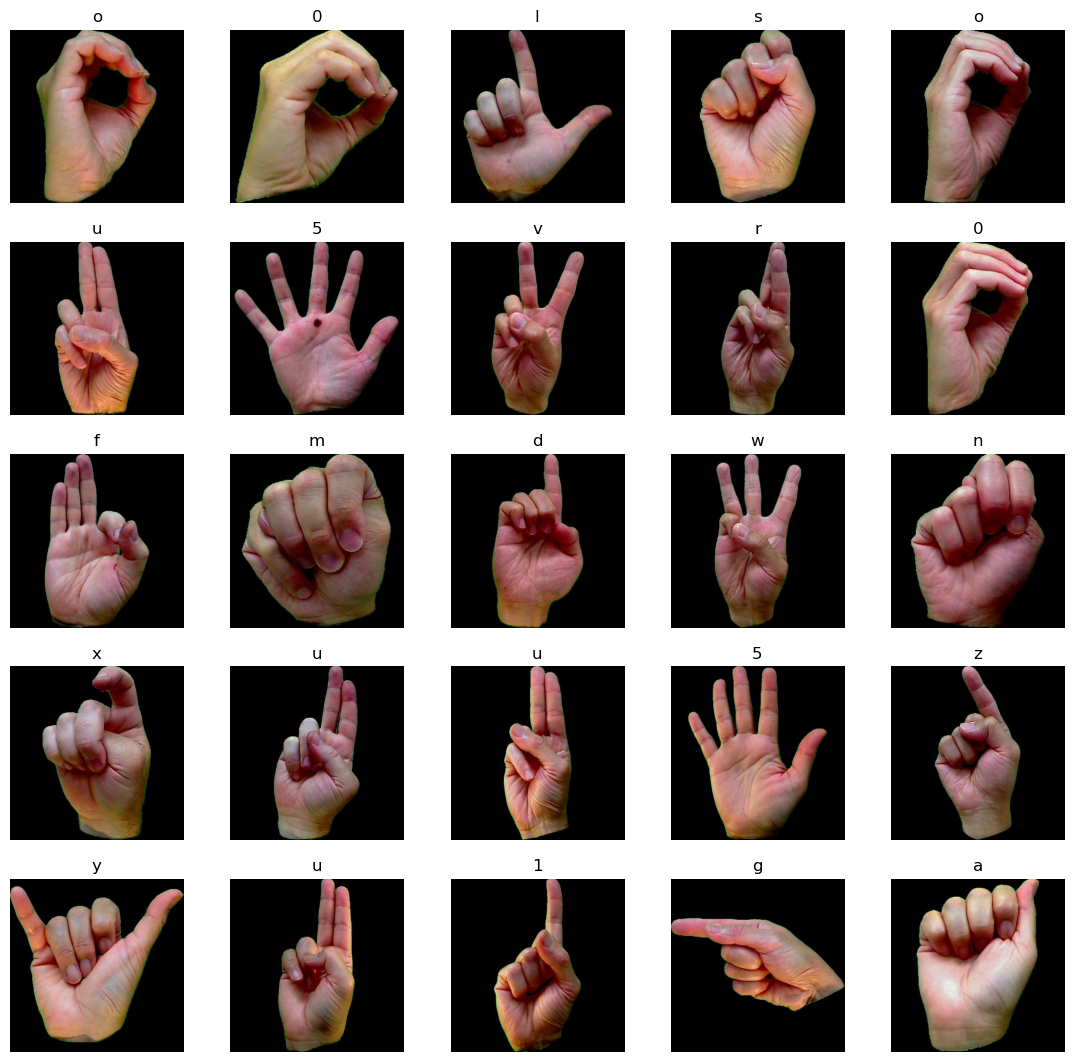

In [5]:
# visualize data
plt.figure(figsize=(11,11))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    plt.axis('off')
    randval = random.choice(list(categories.values()))
    randimg = imread(data_path + '/' + randval + '/' + random.choice(sorted(os.listdir(data_path + '/' + randval + '/'))))
    plt.imshow(randimg)
    plt.title(randval)

In [6]:
x_train, x_test0, y_train, y_test0 = train_test_split(df['file'], df['label'], test_size=0.25, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test0, y_test0, test_size=0.5, random_state=42)
train = pd.concat([x_train,y_train], axis=1).reset_index(drop=True)
test = pd.concat([x_test,y_test], axis=1).reset_index(drop=True)
val = pd.concat([x_val, y_val], axis=1).reset_index(drop=True)
print(np.shape(train))
print(np.shape(test))
print(np.shape(val))
test

(1886, 2)
(314, 2)
(315, 2)


,file,label
0,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,w
1,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,n
2,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,b
3,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,9
4,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,d
...,...,...
309,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,6
310,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,s
311,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,4
312,D:\WEB_projects\archive (3)\asl_dataset\asl_da...,w


In [7]:
# normalize image data and transform into train, test, and validation datasets
image_size = 128
batchsize = 32
class_size = 36

datagen = ImageDataGenerator(rescale=1.0/255)

train_data = datagen.flow_from_dataframe(dataframe=train, x_col='file', y_col='label', target_size=(image_size,image_size), batch_size = batchsize, class_mode='categorical')

test_data = datagen.flow_from_dataframe(dataframe=test, x_col='file', y_col='label', target_size=(image_size,image_size), shuffle=False, batch_size=batchsize, class_mode='categorical')

val_data = datagen.flow_from_dataframe(dataframe=val, x_col='file', y_col='label', target_size=(image_size,image_size), shuffle=False, batch_size = batchsize, class_mode='categorical')

Found 1886 validated image filenames belonging to 36 classes.
Found 314 validated image filenames belonging to 36 classes.
Found 315 validated image filenames belonging to 36 classes.


In [8]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (image_size,image_size,3)))
# model.add(Conv2D(32, 3, activation = 'relu', padding='same'))
model.add(MaxPooling2D(padding='same')) # v3


model.add(Conv2D(64, (5,5), activation = 'relu'))
model.add(MaxPooling2D(padding='same')) # v3

# model.add(Conv2D(64, (5,5), activation = 'relu', padding='same')) #v4
# model.add(MaxPooling2D(padding='same')) # v4  0.9458598494529724

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5)) # v3

model.add(Dense(36, activation = 'softmax'))

model.summary()

C:\Users\vansh\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 124, 124, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 58, 58, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 53824)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,889,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,947,940 (26.50 MB)

 Trainable params: 6,947,940 (26.50 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Initialize callbacks
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, restore_best_weights=True, verbose=0)
reducelr = ReduceLROnPlateau(monitor='val_accuracy', patience=2, factor=0.5, verbose=1)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
classifier = model.fit(train_data, validation_data=val_data, epochs=10, callbacks=[earlystop,reducelr], verbose=1) 

Epoch 1/10


C:\Users\vansh\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


59/59 ━━━━━━━━━━━━━━━━━━━━ 24s 356ms/step - accuracy: 0.2922 - loss: 2.7653 - val_accuracy: 0.8095 - val_loss: 0.5047 - learning_rate: 0.0010
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 17s 286ms/step - accuracy: 0.7898 - loss: 0.6927 - val_accuracy: 0.9111 - val_loss: 0.3032 - learning_rate: 0.0010
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 17s 287ms/step - accuracy: 0.8858 - loss: 0.3519 - val_accuracy: 0.9397 - val_loss: 0.2219 - learning_rate: 0.0010
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 17s 274ms/step - accuracy: 0.9212 - loss: 0.2505 - val_accuracy: 0.9492 - val_loss: 0.1703 - learning_rate: 0.0010
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 17s 280ms/step - accuracy: 0.9474 - loss: 0.1668 - val_accuracy: 0.9556 - val_loss: 0.1746 - learning_rate: 0.0010
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 17s 287ms/step - accuracy: 0.9517 - loss: 0.1719 - val_accuracy: 0.9587 - val_loss: 0.1962 - learning_rate: 0.0010
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 17s 287ms/step - accuracy: 0.9722 - loss: 0.0924 - val_

In [12]:
val_loss, val_accuracy = model.evaluate(val_data)
print('Validation Accuracy =', val_accuracy)
print('Validation Loss =', val_loss)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9754 - loss: 0.1170
Validation Accuracy = 0.9682539701461792
Validation Loss = 0.13730637729167938


In [13]:
test_loss, test_accuracy = model.evaluate(test_data)
print('Test Accuracy =', test_accuracy)
print('Test Loss =', test_loss)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.9482 - loss: 0.1453
Test Accuracy = 0.9426751732826233
Test Loss = 0.18409134447574615


In [14]:
train_loss, train_accuracy = model.evaluate(train_data)
print('Train Accuracy =', train_accuracy)
print('Train Loss =', train_loss)

59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9973 - loss: 0.0074
Train Accuracy = 0.998939573764801
Train Loss = 0.005371110048145056


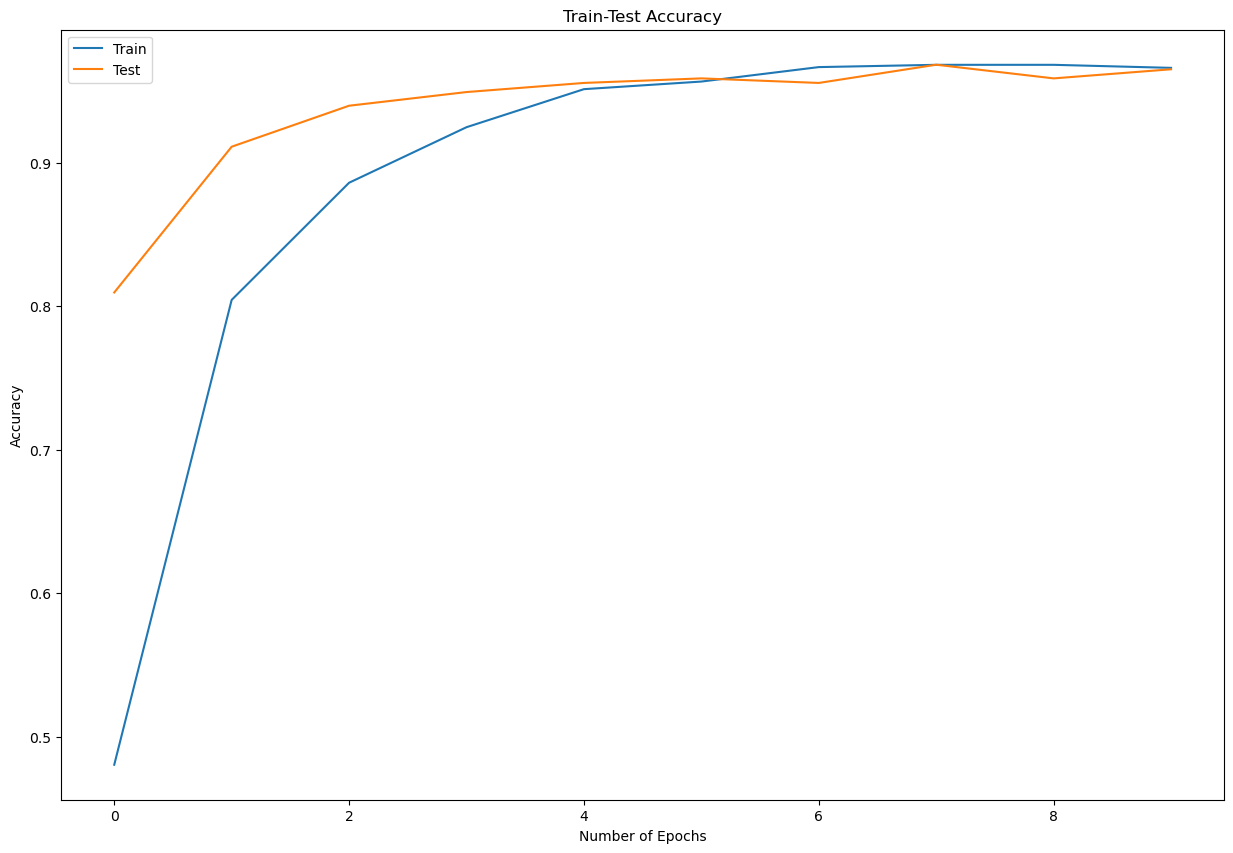

In [15]:
# Visualize accuracy on training and testing groups across epochs
plt.figure(figsize = (15, 10))   
epochs= []
for i in range(10):
    epochs.append(i)
    
plt.plot(epochs,classifier.history['accuracy'], label="Train")
plt.plot(epochs,classifier.history['val_accuracy'], label="Test")
plt.title("Train-Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

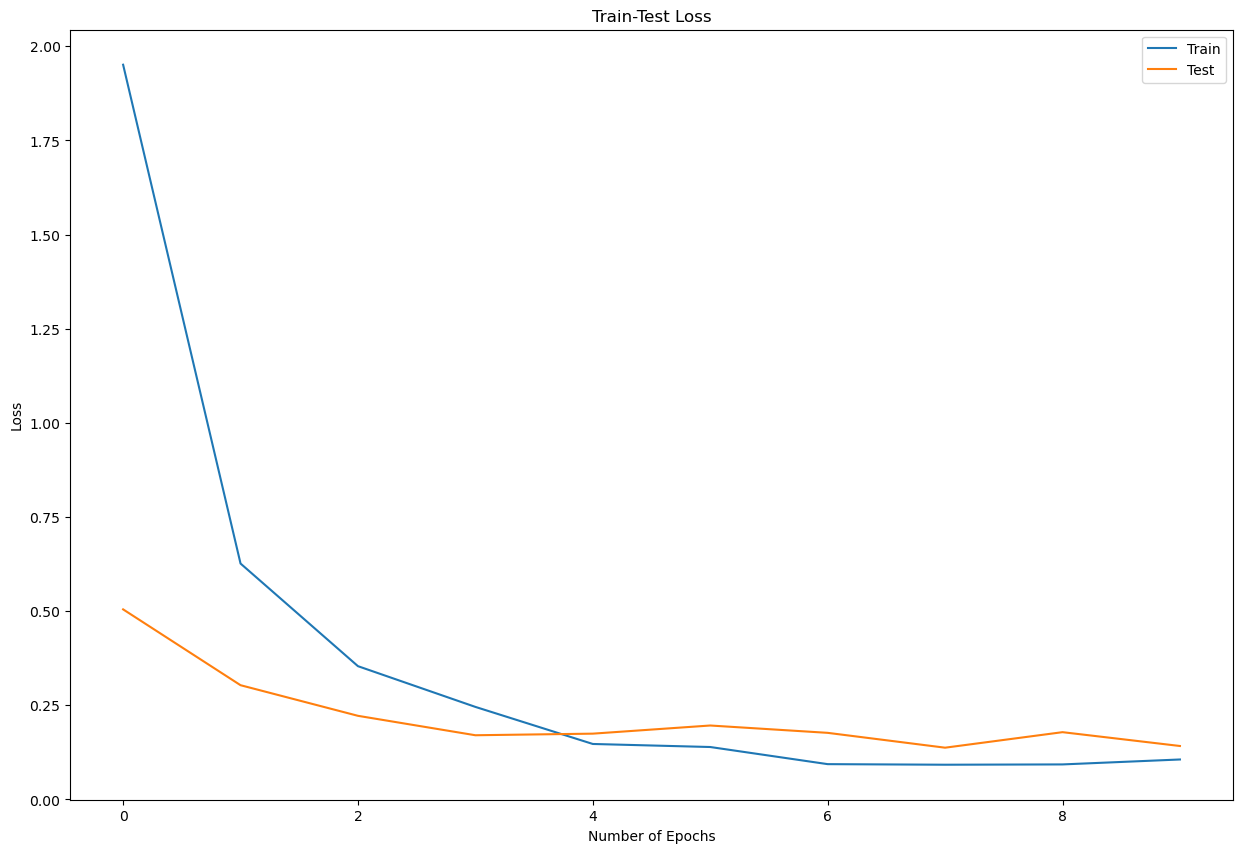

In [16]:
# Visualize loss on training and testing groups across epochs
plt.figure(figsize = (15, 10))   
plt.plot(epochs,classifier.history['loss'], label="Train")
plt.plot(epochs,classifier.history['val_loss'], label="Test")
plt.title("Train-Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [17]:
# Predict on testing dataset and assess accuracy
probs = model.predict(test_data, verbose = 0)
y_pred = np.argmax(probs, axis = 1)
y_actual = test_data.labels

test_loss, test_accuracy = model.evaluate(test_data,verbose = 0)

print('Testing Accuracy:', test_accuracy)
print('Testing Loss:', test_loss, '\n')

correct = np.nonzero(y_pred==y_actual)[0]
incorrect = np.nonzero(y_pred!=y_actual)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0], '\n')

print(classification_report(y_pred, y_actual))

Testing Accuracy: 0.9426751732826233
Testing Loss: 0.18409134447574615 

Correct predicted classes: 296
Incorrect predicted classes: 18 

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.88      0.88      0.88         8
           2       0.71      0.83      0.77         6
           3       1.00      0.80      0.89        10
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         5
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        11
           9       0.91      1.00      0.95        10
          10       0.89      1.00      0.94         8
          11       0.88      1.00      0.93         7
          12       0.88      1.00      0.93         7
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00        

Text(0.5, 1.0, 'Confusion Matrix')

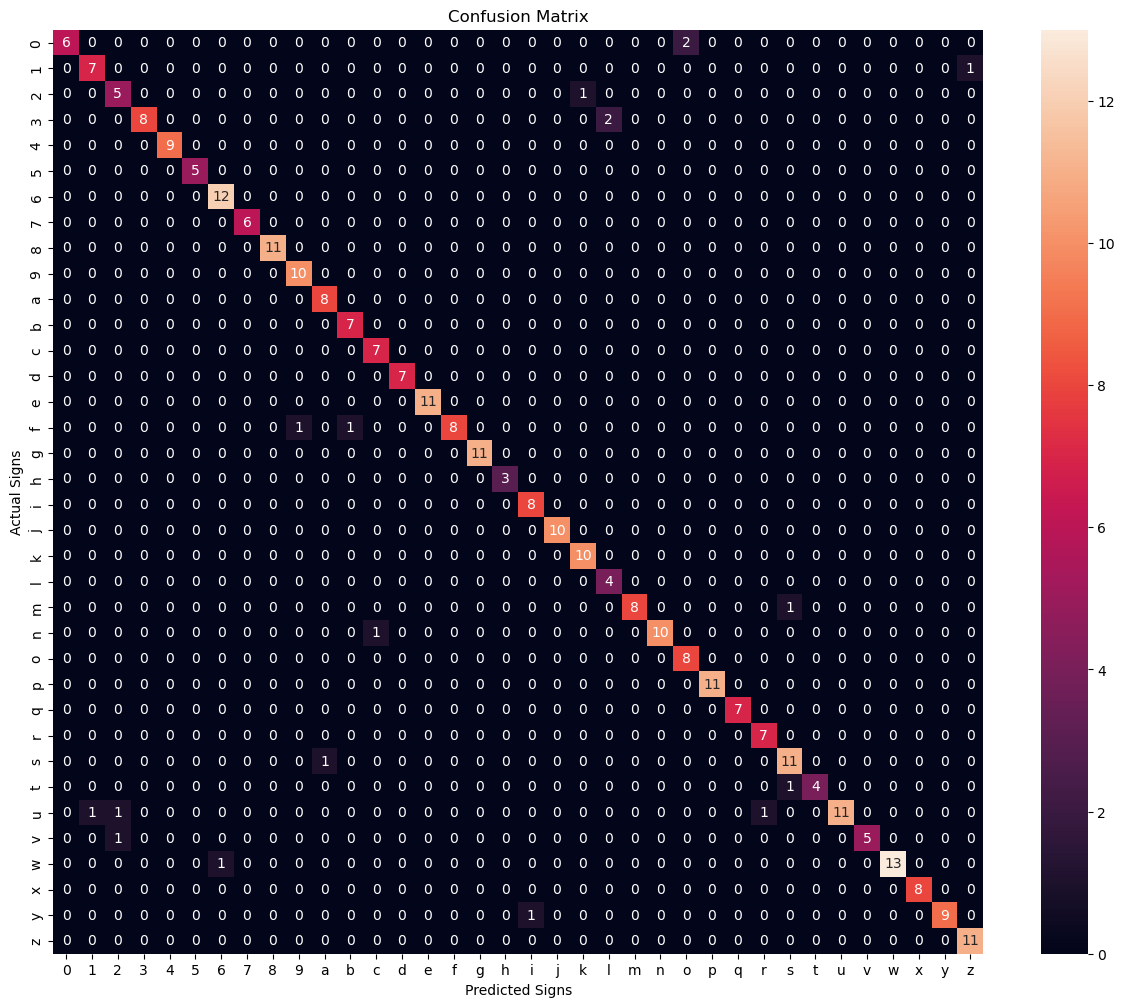

In [18]:
plt.figure(figsize = (15, 12))   
matrix = confusion_matrix(y_pred, y_actual)
matrixdf = pd.DataFrame(matrix, index=categories.values(), columns=categories.values())
sns.heatmap(matrixdf,annot=True,fmt='g')
plt.xlabel("Predicted Signs")
plt.ylabel("Actual Signs")
plt.title("Confusion Matrix")

In [19]:
# Create reverse dictionary of sign and label
labeldict = {}
for key, value in test_data.class_indices.items():
    labeldict[value] = key

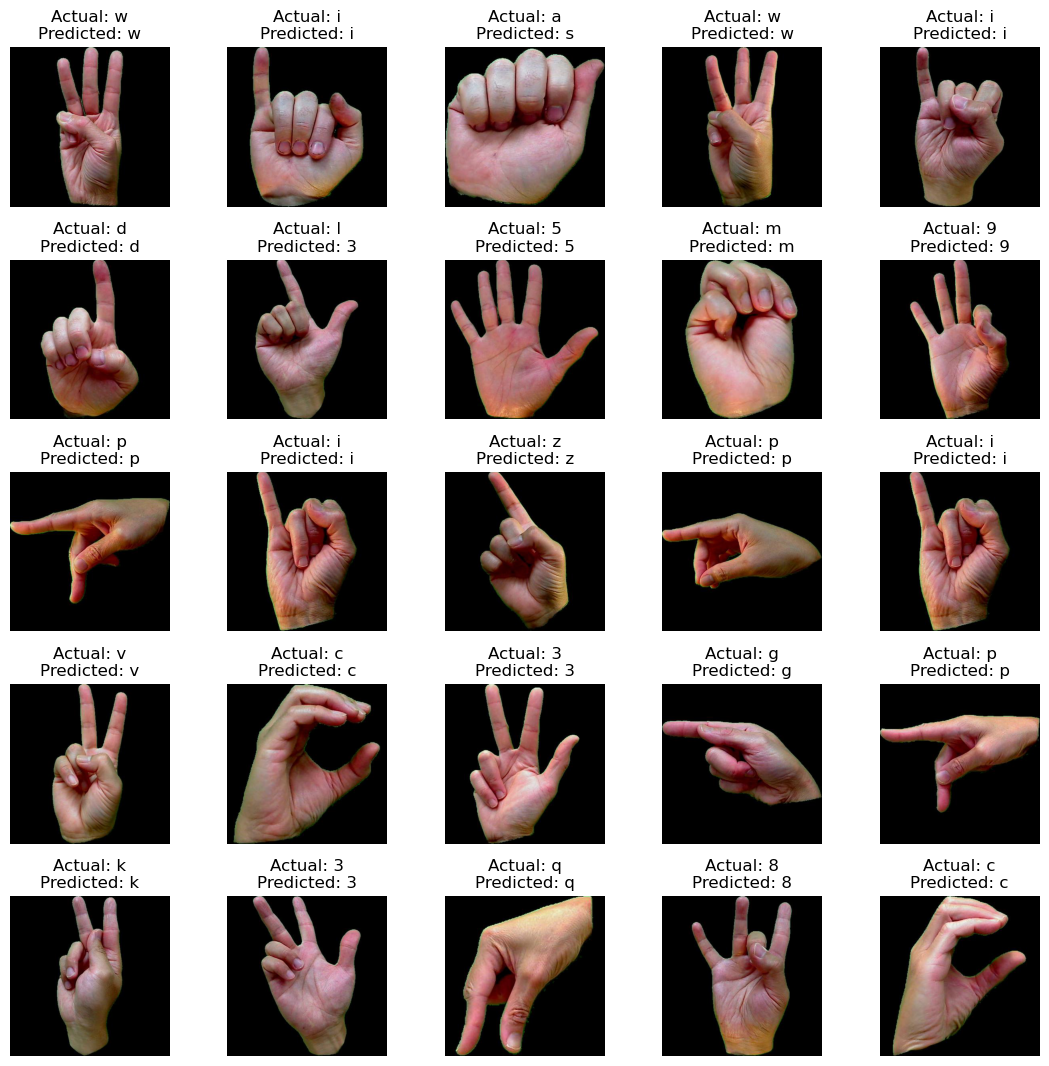

In [20]:
plt.figure(figsize=(11,11))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    plt.axis('off')
    randind = random.randint(0, len(test)-1)
    plt.imshow(imread(test.iloc[randind]['file']))
    plt.title(f"Actual: {labeldict[y_actual[randind]]}\nPredicted: {labeldict[y_pred[randind]]}")

In [21]:
# Save trained model
model.save("sign_model.h5")
trained_model = tf.keras.models.load_model("sign_model.h5")

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
sign_model = load_model('sign_model.h5')
import numpy as np

# Define the dictionary of categories
categories = {
    0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9",
    10: "a", 11: "b", 12: "c", 13: "d", 14: "e", 15: "f", 16: "g", 17: "h", 18: "i",
    19: "j", 20: "k", 21: "l", 22: "m", 23: "n", 24: "o", 25: "p", 26: "q", 27: "r",
    28: "s", 29: "t", 30: "u", 31: "v", 32: "w", 33: "x", 34: "y", 35: "z"
}
import cv2
# Initialize webcam
cap = cv2.VideoCapture(0)

# Define the image size and preprocess function
image_size = 128

def preprocess_frame(frame):
    frame = cv2.resize(frame, (image_size, image_size))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = img_to_array(frame)
    frame = np.expand_dims(frame, axis=0)
    frame = frame.astype('float32') / 255.0
    return frame

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Preprocess the frame
    processed_frame = preprocess_frame(frame)
    
    # Predict the gesture
    predictions = sign_model.predict(processed_frame)
    predicted_class = np.argmax(predictions)
    predicted_label = categories[predicted_class]
    
    # Display the result
    cv2.putText(frame, f'Predicted: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('Sign Language Gesture Recognition', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import mediapipe as mp


sign_model = load_model('sign_model.h5')

# Define the dictionary of categories
categories = {
    0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9",
    10: "a", 11: "b", 12: "c", 13: "d", 14: "e", 15: "f", 16: "g", 17: "h", 18: "i",
    19: "j", 20: "k", 21: "l", 22: "m", 23: "n", 24: "o", 25: "p", 26: "q", 27: "r",
    28: "s", 29: "t", 30: "u", 31: "v", 32: "w", 33: "x", 34: "y", 35: "z"
}

# Initialize Mediapipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(max_num_hands=1)
mp_drawing = mp.solutions.drawing_utils

# Initialize webcam
cap = cv2.VideoCapture(0)

# Define the image size and preprocess function
image_size = 128

def preprocess_frame(frame):
    frame = cv2.resize(frame, (image_size, image_size))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = img_to_array(frame)
    frame = np.expand_dims(frame, axis=0)
    frame = frame.astype('float32') / 255.0
    return frame

# Buffer to store the detected letters for word formation
word_buffer = []
current_letter = None
letter_consistency_counter = 0
required_consistency = 10  

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Flip the frame horizontally for a later selfie-view display
    frame = cv2.flip(frame, 1)

    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with Mediapipe
    result = hands.process(rgb_frame)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Draw hand landmarks on the frame
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Extract ROI based on hand landmarks
            x_min = int(min([lm.x for lm in hand_landmarks.landmark]) * frame.shape[1])
            y_min = int(min([lm.y for lm in hand_landmarks.landmark]) * frame.shape[0])
            x_max = int(max([lm.x for lm in hand_landmarks.landmark]) * frame.shape[1])
            y_max = int(max([lm.y for lm in hand_landmarks.landmark]) * frame.shape[0])

            roi = frame[y_min:y_max, x_min:x_max]

            if roi.size > 0:
                # Preprocess the ROI
                processed_roi = preprocess_frame(roi)

                # Predict the gesture
                predictions = sign_model.predict(processed_roi)
                predicted_class = np.argmax(predictions)
                predicted_label = categories[predicted_class]

                # Check if the predicted label is stable
                if predicted_label == current_letter:
                    letter_consistency_counter += 1
                else:
                    current_letter = predicted_label
                    letter_consistency_counter = 0

                # If the letter is consistent over required frames, add it to the buffer
                if letter_consistency_counter >= required_consistency:
                    word_buffer.append(predicted_label)
                    letter_consistency_counter = 0  # Reset for next letter
                    current_letter = None

                # Form the current word from the buffer
                current_word = ''.join(word_buffer)

                # Display the current predicted character and formed word
                cv2.putText(frame, f'Predicted: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
                cv2.putText(frame, f'Word: {current_word}', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Show the frame
    cv2.imshow('Sign Language Gesture Recognition', frame)

    # Space bar to add space (indicate the end of a word)
    if cv2.waitKey(1) & 0xFF == ord(' '):
        word_buffer.append(' ')
        current_letter = None  # Reset to start a new word

    # 's' to finalize the current word (stop)
    if cv2.waitKey(1) & 0xFF == ord('s'):
        word_buffer.append(' | ')  # Add a separator or end the word
        current_letter = None

    # Clear the word buffer if 'c' is pressed
    if cv2.waitKey(1) & 0xFF == ord('c'):
        word_buffer = []
        current_letter = None

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()
